# Data Processing

In [15]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

dataset = datasets.load_boston()
features = dataset.data
labels = dataset.target

Nsplit = 50
X_train, y_train = features[:-Nsplit], labels[:-Nsplit]
X_test, y_test = features[-Nsplit:], labels[-Nsplit:]

#################  train process ####################
mean = np.mean(X_train,axis=0)
std = np.std(X_train,axis=0)
[data_num,feature_num]=np.shape(X_train)

for i in range(data_num):
    for j in range(feature_num):
        X_train[i][j] = (X_train[i][j]-mean[j])/std[j]
X_train = np.insert(X_train,0,1,axis = 1)
#mean = np.mean(X_train,axis=0)
#std = np.std(X_train,axis=0) 
[data_num,feature_num]=np.shape(X_train)
X_train =X_train.reshape(data_num,feature_num)
y_train =y_train.reshape(data_num,1)
###################    text process ######################
[data_num2,feature_num2]=np.shape(X_test)
for i in range(data_num2):
    for j in range(feature_num2):
        X_test[i][j] = (X_test[i][j]-mean[j])/std[j]
X_test = np.insert(X_test,0,1,axis = 1)
#mean = np.mean(X_train,axis=0)
#std = np.std(X_train,axis=0) 
[data_num2,feature_num2]=np.shape(X_test)
X_test =X_test.reshape(data_num2,feature_num2)
y_test =y_test.reshape(data_num2,1)

# Stochastic gradient descent (SGD)

Text(0,0.5,'Error')

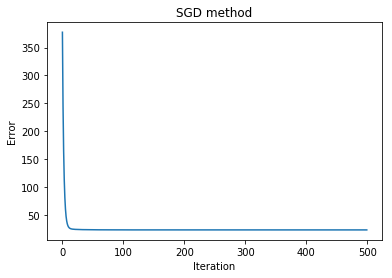

In [16]:
w = np.random.uniform(0.1,0.1,feature_num) 
rate = 5e-4
irratation = 500
error = []

for i in range(irratation):
    order = np.arange(data_num)
    np.random.shuffle(order)
    x = X_train[order]
    
    y = y_train[order]
    for j in range(data_num):
        diff = w@x[j,:] - y[j]
        w = w - rate*(diff*x[j,:])
    er = (w@X_train.T) -y_train.T
    err = 1/data_num*(er@er.T)
    error.append(err)
plt.plot(range(500),np.reshape(error,500))  
plt.title("SGD method")
plt.xlabel('Iteration')
plt.ylabel('Error')
#plt.legend(labels = ['Train'], loc = 'best')
#plt.savefig("Stochastic gradient descent.png")
#print('Weighted Vector:'+str(w))

#diff = w@X_train.T-y_train.T
#print('Train Error:'+str((diff@diff.T)/data_num))

#diff2 = w@X_test.T - y_test.T
#print('Test Error:' + str(diff2@diff2.T/data_num2))

# Batch gradient descent (BGD)

Text(0,0.5,'Error')

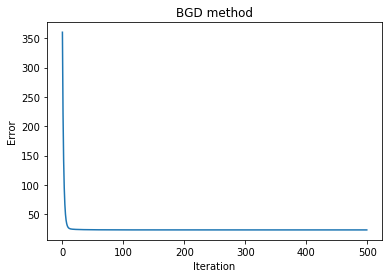

In [17]:
w = np.random.uniform(-0.1,0.1,feature_num) 
rate = 5e-4
irratation = 500
error = []
for i in range(irratation):
    diff = w@X_train.T - y_train.T
    w = w - rate*(diff@X_train)
    er = (w@X_train.T) -y_train.T
    err = 1/data_num*(er@er.T)
    error.append(err)
plt.plot(range(500),np.reshape(error,500))   
plt.title("BGD method")
plt.xlabel('Iteration')
plt.ylabel('Error')
#plt.legend(labels = ['Train'], loc = 'best')
#plt.savefig(" Batch gradient descent (BGD).png")
#print('Weighted Vector:'+str(w))
#print('Train Error:'+str((diff@diff.T)/data_num))

#diff2 = w@X_test.T - y_test.T
#print('Test Error:' + str((diff2@diff2.T)/data_num2))

# Closed form solution(pinv)

In [18]:
U, s, V = np.linalg.svd(X_train)
S_inv = np.zeros((feature_num,data_num))
S_inv[:,0:feature_num] = np.diag(1 / s)
x_pseudoinverse = np.dot(V.T, np.dot(S_inv, U.T))
w_pred = x_pseudoinverse.dot(y_train)
print('Weighted Vector:'+str(w_pred.T))
er = (w_pred.T@X_train.T) -y_train.T
MSE = np.min(np.abs(er**2))
diff = w_pred.T@X_train.T - y_train.T
print('Train Error:'+str((diff@diff.T)/data_num))
diff2 = w_pred.T@X_test.T - y_test.T
print('Test Error:' + str((diff2@diff2.T)/data_num2))

Weighted Vector:[[22.94100877 -0.93652728  1.18983479  0.2180906   0.66954197 -2.10545149
   2.75102471  0.30777503 -3.12356704  2.96148512 -2.45469868 -2.00737039
   0.90552685 -4.05749492]]
Train Error:[[23.19155647]]
Test Error:[[10.96654317]]


# 1e

In [19]:
def preproc_params(X_train):
   params = np.shape(X_train)
   return params
def preprocess(X_source,X_input,params):
    [num_data,feature_num] = np.shape(X_input)
    if feature_num == 14:
        return X_input
    mean = np.mean(X_source,axis=0)
    std = np.std(X_source,axis=0)
    for i in range(num_data):
        for j in range(feature_num):
            X_input[i][j] = (X_input[i][j]-mean[j])/std[j]
    X_input = np.insert(X_input,0,1,axis = 1)
    [data_num,feature_num]=np.shape(X_input)
    X_input =X_input.reshape(data_num,feature_num)
    return X_input
def solve(X_train,y_train):
    w = np.linalg.pinv(X_train).dot(y_train)
    w = np.reshape(w,(14,1))
    return w
def mse(X_train, y_train, w):
    [data_num,feature_num ]= np.shape(X_train)
    y_train = np.reshape(y_train,(data_num,1))
    er= (X_train@w-y_train)
    error_test=1/data_num*(er.T@er)
    return error_test

In [6]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Load dataset
dataset = datasets.load_boston()

# Original features
features_orig = dataset.data
labels_orig = dataset.target
Ndata = len(features_orig)

train_errs = []
test_errs = []

for k in range(100):

  # Shuffle data
  rand_perm = np.random.permutation(Ndata)
  features = [features_orig[ind] for ind in rand_perm]
  labels = [labels_orig[ind] for ind in rand_perm]

  # Train/test split
  Nsplit = 50
  X_train, y_train = features[:-Nsplit], labels[:-Nsplit]
  X_test, y_test = features[-Nsplit:], labels[-Nsplit:]

  # Preprocess your data - Normalization, adding a constant feature
  params = preproc_params(X_train)
  
  X_test = preprocess(X_train,X_test, params)
  X_train = preprocess(X_train,X_train, params)
  # Solve for optimal w
  # Use your solver function
  w =solve(X_train, y_train)

  # Collect train and test errors
  # Use your implementation of the mse function
  train_errs.append(mse(X_train, y_train, w))
  test_errs.append(mse(X_test, y_test, w))

print('Mean training error: ', np.mean(train_errs))
print('Mean test error: ', np.mean(test_errs))
print(w)

Mean training error:  21.801923659236063
Mean test error:  23.796547137339626
[[22.64364035]
 [-0.86603839]
 [ 0.99719542]
 [ 0.20475762]
 [ 0.84018454]
 [-1.92205742]
 [ 3.00445451]
 [ 0.02774327]
 [-2.88354606]
 [ 2.36256206]
 [-2.12383659]
 [-2.04266253]
 [ 0.81979418]
 [-3.44916762]]
